In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
df = pd.read_csv('insurance_data_logistic')
X = df['age'].values.reshape(-1, 1) # Feature
y = df['bought_insurance'].values    # Target

# --- 2. Data Preparation: Standardization and Intercept ---
# Standardization is crucial for Gradient Descent convergence
mean_age = np.mean(X)
std_age = np.std(X)
X_scaled = (X - mean_age) / std_age

# Add intercept term (a column of ones)
X_final = np.insert(X_scaled, 0, 1, axis=1)

# --- 3. Implement Logistic Regression from Scratch ---
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []

    def sigmoid(self, z):
        # Sigmoid Function: \sigma(z) = 1 / (1 + e^(-z))
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights (\theta) to zeros
        m, n = X.shape
        self.weights = np.zeros(n)

        # Gradient Descent
        for i in range(self.n_iterations):
            # 1. Linear model: z = X * \theta
            z = np.dot(X, self.weights)

            # 2. Hypothesis: h(x) = sigmoid(z)
            h = self.sigmoid(z)

            # 3. Calculate Cost (Binary Cross-Entropy)
            # J(\theta) = -1/m * sum(y * log(h) + (1-y) * log(1-h))
            cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
            self.cost_history.append(cost)

            # 4. Calculate Gradient
            # Gradient = (1/m) * X^T * (h - y)
            gradient = (1/m) * np.dot(X.T, (h - y))

            # 5. Update Weights
            # \theta := \theta - \alpha * Gradient
            self.weights = self.weights - self.learning_rate * gradient

    def predict_proba(self, X):
        z = np.dot(X, self.weights)
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# --- 4. Train the Model ---
model_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=10000)
model_scratch.fit(X_final, y)

# --- 5. Evaluate and Plot ---
y_pred_scratch = model_scratch.predict(X_final)
accuracy = np.mean(y_pred_scratch == y)
print(accuracy)

0.8888888888888888


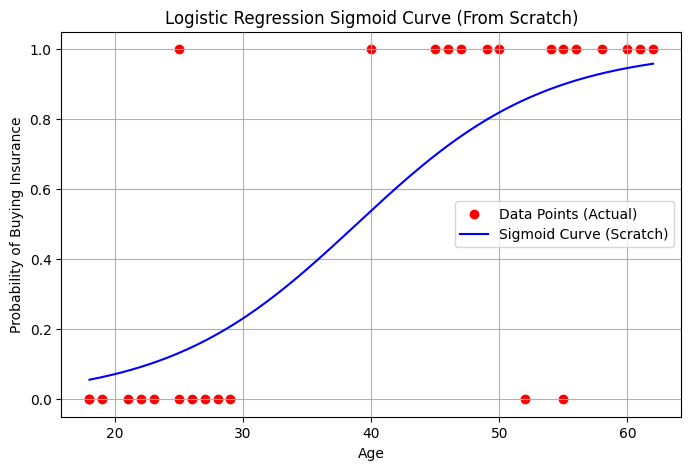

In [4]:
# --- Dependencies for Plotting Data ---
# Ensure these variables are defined by running the preceding cells:
# df (DataFrame), model_scratch (trained object), mean_age, std_age

# 1. Prepare ages (X values) for the smooth curve
age_min = df['age'].min()
age_max = df['age'].max()
plot_ages = np.linspace(age_min, age_max, 300).reshape(-1, 1)

# 2. Scale the plotting ages using the mean and std calculated earlier
plot_ages_scaled = (plot_ages - mean_age) / std_age

# 3. Add the intercept term (column of ones) to the scaled ages
plot_X = np.insert(plot_ages_scaled, 0, 1, axis=1)

# 4. Calculate the probabilities (Y values) for the smooth curve
plot_probabilities = model_scratch.predict_proba(plot_X)

# --- Generate the Plot ---
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['bought_insurance'], marker='o', color='red', label='Data Points (Actual)')
plt.plot(plot_ages, plot_probabilities, color='blue', label='Sigmoid Curve (Scratch)')
plt.title('Logistic Regression Sigmoid Curve (From Scratch)')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.grid(True)
plt.legend()
plt.savefig('sigmoid_curve_scratch_fixed.png')
# plt.show() # Use this in your local notebook instead of savefig